In [4]:
!pip install pandas
!pip install numpy


'pip' is not recognized as an internal or external command,
operable program or batch file.
'pip' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
import numpy as np
import pandas as pd

In [11]:
df=pd.read_csv("C:/Users/User/Downloads/train_u6lujuX_CVtuZ9i.csv")
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
var_col=[col for col in df.columns if df[col].dtype=='object']
num_col=[col for col in df.columns if df[col].dtype!='object']
print(var_col)
print(num_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [19]:
round(df.isnull().sum(),2)

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [46]:
df1=df.drop(columns=['CoapplicantIncome'])
df1.dropna(subset=['Gender','Married','Self_Employed','Dependents'],inplace=True)
df1.fillna({
    'Loan_Amount_Term': df1['Loan_Amount_Term'].mean(),
    'LoanAmount': df1['LoanAmount'].mean(),
    'Credit_History': df1['Credit_History'].mean(),
}, inplace=True)



In [48]:
round(df1.isnull().sum(),2)

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

In [55]:
mean=df1['LoanAmount'].mean()
variance=df1['LoanAmount'].std()
lower_bound=mean-2*variance
upper_bound=mean+2*variance
df2=df1[(df1['LoanAmount']>lower_bound) & (df1['LoanAmount']<upper_bound)]

In [57]:
round(df2.isnull().sum(),2)

Loan_ID             0
Gender              0
Married             0
Dependents          0
Education           0
Self_Employed       0
ApplicantIncome     0
LoanAmount          0
Loan_Amount_Term    0
Credit_History      0
Property_Area       0
Loan_Status         0
dtype: int64

Matplotlib is building the font cache; this may take a moment.


{'whiskers': [<matplotlib.lines.Line2D at 0x1c33b615850>,
 'caps': [<matplotlib.lines.Line2D at 0x1c33b617250>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c33b614b10>],
 'medians': [<matplotlib.lines.Line2D at 0x1c33b628bd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c33b6297d0>],
 'means': []}

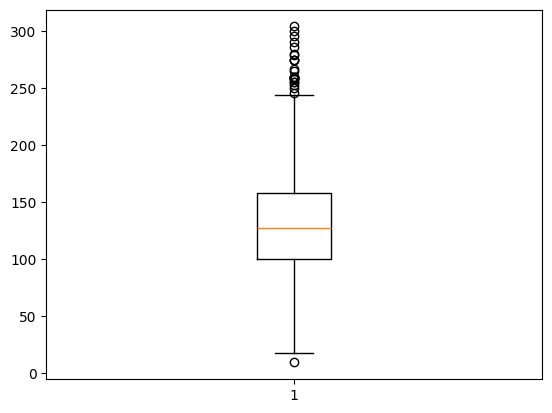

In [59]:
import matplotlib.pyplot as plt
plt.boxplot(df2['LoanAmount'])
